In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:\\Users\\mm110\OneDrive\\Desktop\\ml projects\\honey_purity_dataset.csv')

In [3]:
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [4]:
df.isnull()


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
247898,False,False,False,False,False,False,False,False,False,False,False
247899,False,False,False,False,False,False,False,False,False,False,False
247900,False,False,False,False,False,False,False,False,False,False,False
247901,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [7]:
from sklearn.feature_selection import mutual_info_regression

In [8]:
df.drop('Pollen_analysis',axis=1,inplace=True)


In [9]:
y = df["Purity"]
X = df.drop("Purity", axis=1)
mi_score = mutual_info_regression(X, y)
features_mi = list(zip(X.columns, mi_score))
sorted_features_mi = sorted(features_mi, key=lambda x: x[1], reverse=True)
for feature, score in sorted_features_mi:
    print(f"{feature}: {score}")

Price: 2.553063426322254
pH: 0.5447974992221294
CS: 0.43636692801982413
F: 0.24892273968219492
Density: 0.22289351717261763
G: 0.20754296553788798
WC: 0.1622025843547661
Viscosity: 0.15344327111812284
EC: 0.0009337194310914398


In [10]:
df.drop('EC',axis=1,inplace=True)
df.head()

,CS,Density,WC,pH,F,G,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,39.02,33.63,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,38.15,34.41,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,27.47,34.36,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,31.52,28.15,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,29.65,42.52,5125.44,1.00,432.62


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

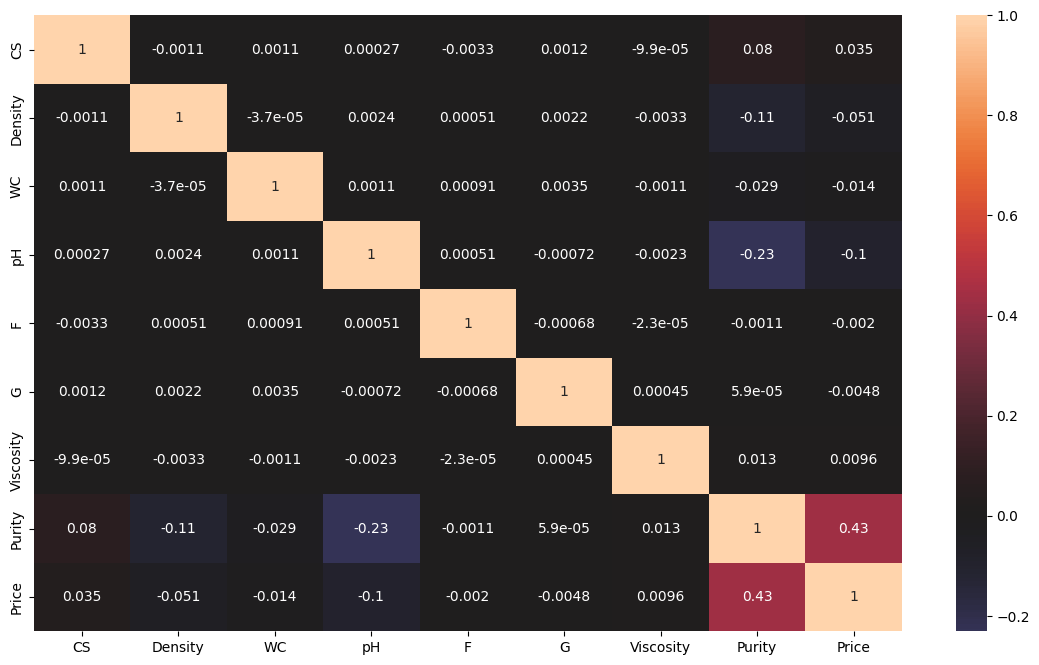

In [12]:
corr_matrix=df.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0, annot=True)

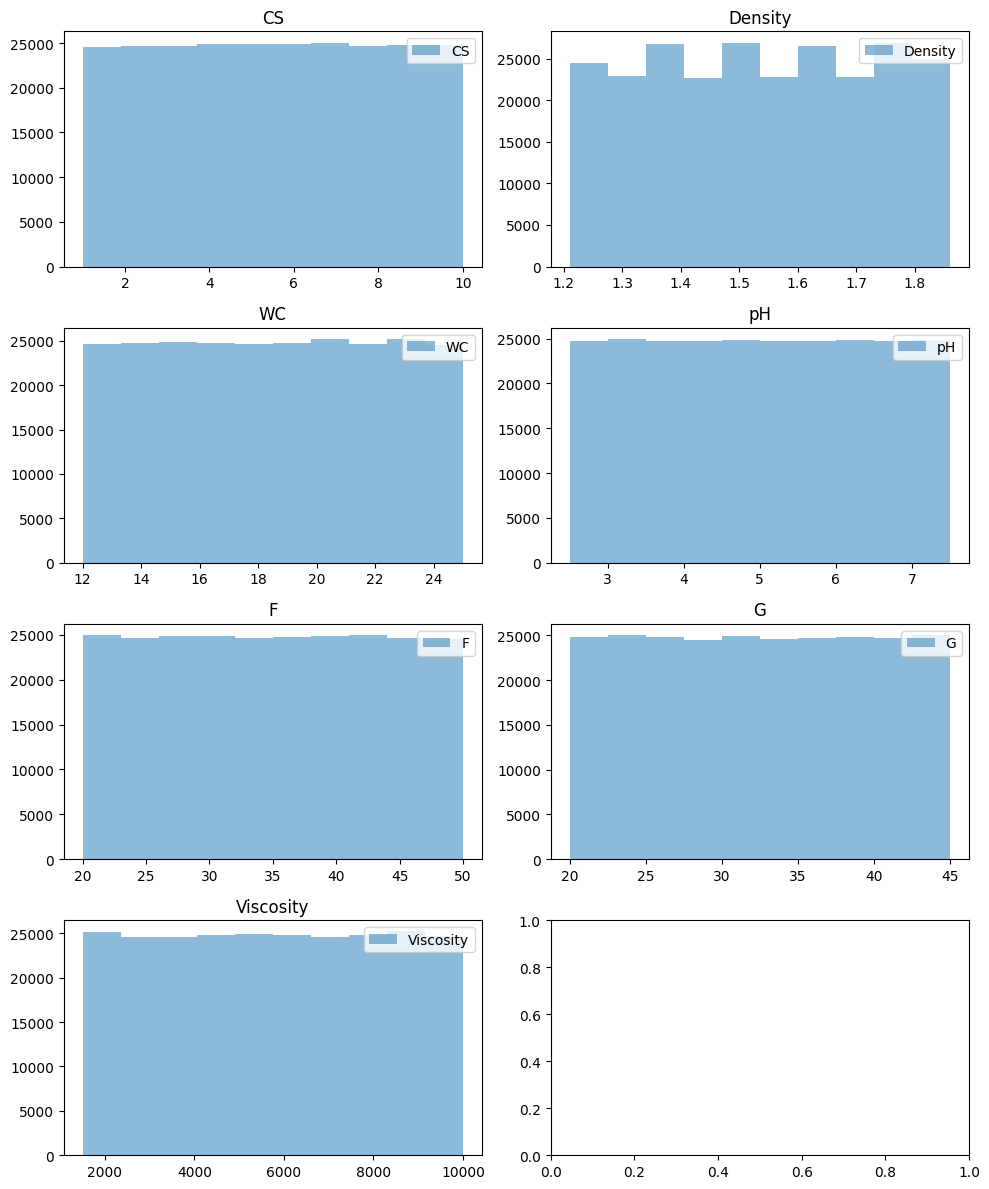

In [13]:
import matplotlib.pyplot as plt

def create_histogram(ax, feature, data):
    ax.hist(data[feature], bins=10, alpha=0.5, label=feature)
    ax.set_title(feature)
    ax.legend()

fig, axes = plt.subplots(4, 2, figsize=(10, 12))  
features = ['CS', 'Density', 'WC', 'pH', 'F', 'G', 'Viscosity']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    create_histogram(axes[row, col], feature, df)

plt.tight_layout() 
plt.show()



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [15]:
train_size = len(X) - 400
X_train, X_temp, y_train, y_temp = train_test_split(X[:train_size], y[:train_size], test_size=0.111, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [16]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train_scaled, y_train, epochs=54, batch_size=32, validation_data=(X_cv_scaled, y_cv))

Epoch 1/54
6876/6876 [==============================] - 17s 2ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 2/54
6876/6876 [==============================] - 15s 2ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/54
6876/6876 [==============================] - 16s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/54
6876/6876 [==============================] - 15s 2ms/step - loss: 0.0011 - val_loss: 9.1880e-04
Epoch 5/54
6876/6876 [==============================] - 15s 2ms/step - loss: 9.2802e-04 - val_loss: 7.1679e-04
Epoch 6/54
6876/6876 [==============================] - 15s 2ms/step - loss: 8.4360e-04 - val_loss: 7.4729e-04
Epoch 7/54
6876/6876 [==============================] - 16s 2ms/step - loss: 7.7195e-04 - val_loss: 7.4863e-04
Epoch 8/54
6876/6876 [==============================] - 16s 2ms/step - loss: 7.4645e-04 - val_loss: 5.8073e-04
Epoch 9/54
6876/6876 [==============================] - 16s 2ms/step - loss: 7.1005e-04 - val_loss: 6.2151e-04
Epoch 10/54
6876/6876 [======

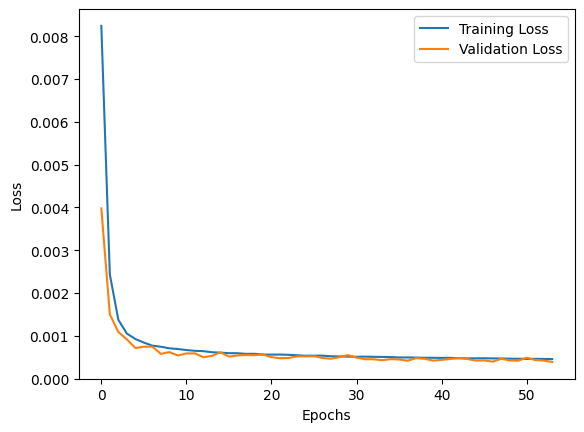

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
x_cv_predict=model.predict(X_cv_scaled)
mse_cv=mean_squared_error(y_cv,x_cv_predict)
r2_cv=r2_score(y_cv,x_cv_predict)
print("Mean Squared Error on :")
print(mse_cv)
print("R^2 Score on: ")
print(r2_cv)

430/430 [==============================] - 0s 815us/step
Mean Squared Error on :
0.00039216275737342845
R^2 Score on: 
0.9797133922883715


In [21]:
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


430/430 [==============================] - 0s 549us/step


In [22]:
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'Mean Absolute Error on Test Set: {mae_test}')
print(f'R2 Score on Test Set: {r2_test}')

Mean Squared Error on Test Set: 0.00043323271314721053
Mean Absolute Error on Test Set: 0.009960225549007665
R2 Score on Test Set: 0.9776908317517259


In [23]:
results = pd.DataFrame({'Original Purity': y_test, 'Predicted Purity': y_pred_test.flatten()})
results


,Original Price,Predicted Price
146735,0.89,0.891006
46186,0.68,0.669142
213378,0.94,0.945254
227514,1.00,1.002549
137853,0.66,0.654930
...,...,...
65935,0.68,0.685296
130190,0.88,0.878773
231003,0.97,0.967523
186063,0.68,0.665610
